In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import json

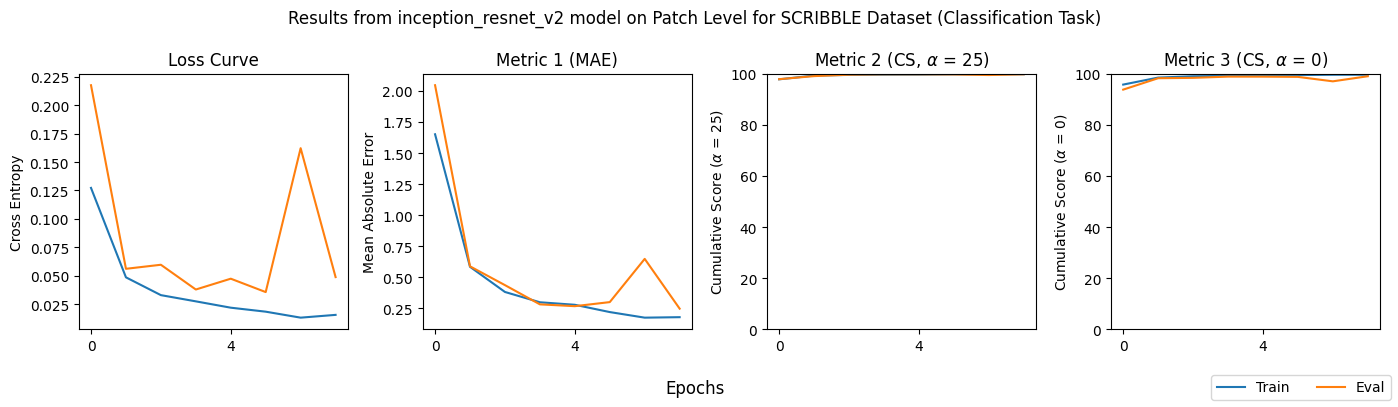

In [16]:
def epoch_plot(run_path, skip_n=0, direct_path=False):
    if not direct_path:
        epoch_path = "epoch_log_" + run_path.split(os.sep)[1] + ".csv"
    else:
        epoch_path = run_path
        run_path = os.path.dirname(run_path)
    
    with open(os.path.join(run_path, "settings.json"), "r") as f:
        settings = json.load(f)

    is_classification = settings.get("classification", False)

    task = "Classification" if is_classification else "Regression"

    path = os.path.join(run_path, epoch_path)
    df = pd.read_csv(path)
    fig, axs = plt.subplots(1, 4, figsize=(14, 4))

    for set_type in ["train", "eval"]:
        set_df = df[df["set_type"] == set_type]
        
        loss_vals = set_df["mean_loss"].to_numpy()[skip_n:]
        mae_vals = set_df["mae"].to_numpy()[skip_n:]
        cs0_vals = set_df["cs_0"].to_numpy()[skip_n:]
        cs25_vals = set_df["cs_25"].to_numpy()[skip_n:]

        n_epochs = set_df.shape[0]
        x = np.arange(skip_n, n_epochs)

        loss_name = "Cross Entropy" if is_classification else "Mean Squared Error"

        titles = [(loss_name, "Loss Curve", loss_vals),
                  ("Mean Absolute Error", "Metric 1 (MAE)", mae_vals),
                  (r"Cumulative Score ($\alpha$ = 25)", r"Metric 2 (CS, $\alpha$ = 25)", cs25_vals),
                  (r"Cumulative Score ($\alpha$ = 0)", r"Metric 3 (CS, $\alpha$ = 0)", cs0_vals)]
        
        plots = []
        for ax, (y_label, title, y) in zip(axs, titles):
            ax.set_xticks(np.arange(skip_n, n_epochs + 1, 4)) # linspace instead
            plots.append(ax.plot(x, y, label=set_type.title()))
            ax.set_ylabel(y_label)
            ax.set_title(title)

        axs[2].set_ylim(0, 100)
        axs[3].set_ylim(0, 100)

    fig.subplots_adjust(wspace=0.3, top=0.8)
    fig.supxlabel("Epochs")
    fig.suptitle(f"Results from {settings['model_name']} model on Patch Level for {settings['dataset'].upper()} Dataset ({task} Task)")
    fig.tight_layout()

    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    fig.legend(by_label.values(), by_label.keys(), loc="lower right", ncols=2)

    plot_name = os.path.basename(path).split(".")[0]
    plot_path = os.path.dirname(path)
    plt.savefig(os.path.join(plot_path, plot_name + ".png"), dpi=300)
    plt.savefig(os.path.join(plot_path, plot_name + ".pdf"))
    
    plt.show()

epoch_plot("runs/Feb2-12-2-23")

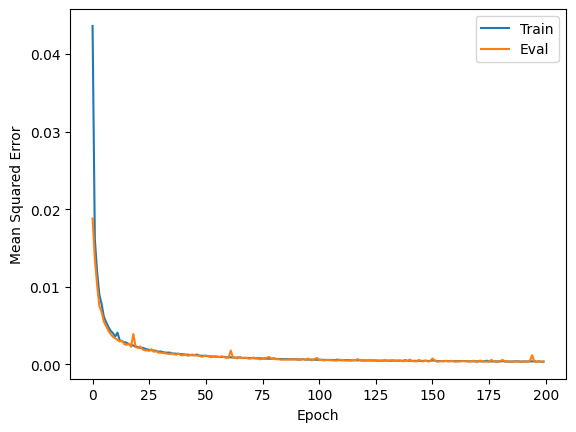

In [14]:
def epoch_autoencoder(path):
    df = pd.read_csv(path)
    fig, axs = plt.subplots()

    for set_type in ["train", "eval"]:
        set_df = df[df["set_type"] == set_type]

        loss_vals = set_df["mean_loss"].to_numpy()

        plt.plot(loss_vals, label=set_type.title())

    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Mean Squared Error")
    plt.show()

epoch_autoencoder("runs/autoencoder_0/epoch_log_Jan29-10-0-44.csv")